# BEFORE STARTING:
File -> Save a copy in drive

Then, navigate to your copy of the notebook and work from there.

### Let's start by getting an image from the internet:

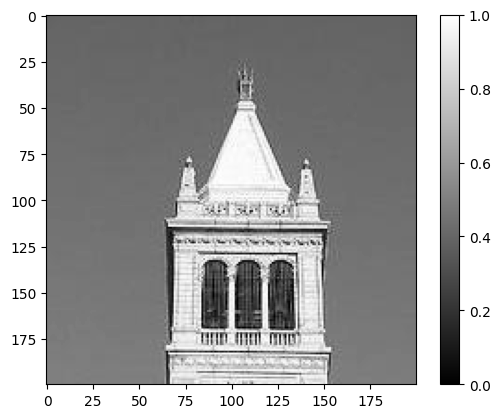

In [1]:
import numpy as np
from PIL import Image
import urllib.request
import io
import matplotlib.pyplot as plt

# URL of the image we're going to be examining
url = r'https://hr.berkeley.edu/sites/default/files/styles/openberkeley_image_full/public/general/uc-berkeley-sather-tower-the-campanile-clock-tower-7d10059-wingsdomain-art-and-photography.jpg?itok=osSOB1AX&c=b3fd84851816f4e5bf15e8323eb5465f&timestamp=1524518714'

with urllib.request.urlopen(url) as url:
    f = io.BytesIO(url.read())

# Open the image file with PIL and convert to numpy array
img = Image.open(f).convert('L') # convert to grayscale
img = np.array(img) / 255.

# Crop
img = img[:200, 200:400]

plt.imshow(img, cmap='gray')
plt.colorbar()

### Okay, now we have our image, let's define a convolution function then try out a few filters

<Figure size 640x480 with 0 Axes>

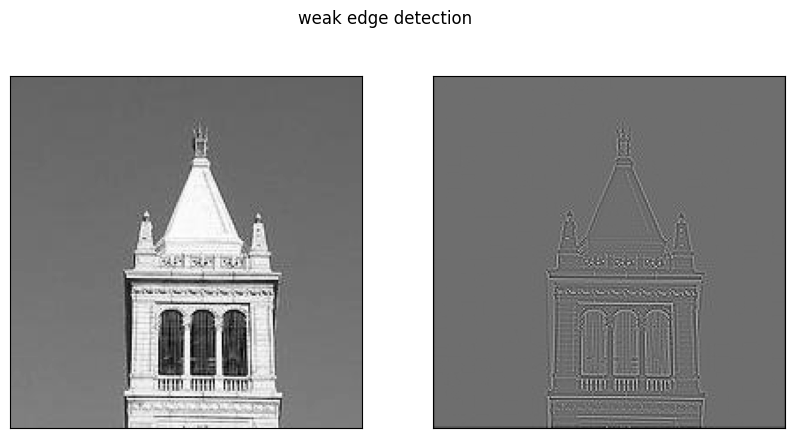

<Figure size 640x480 with 0 Axes>

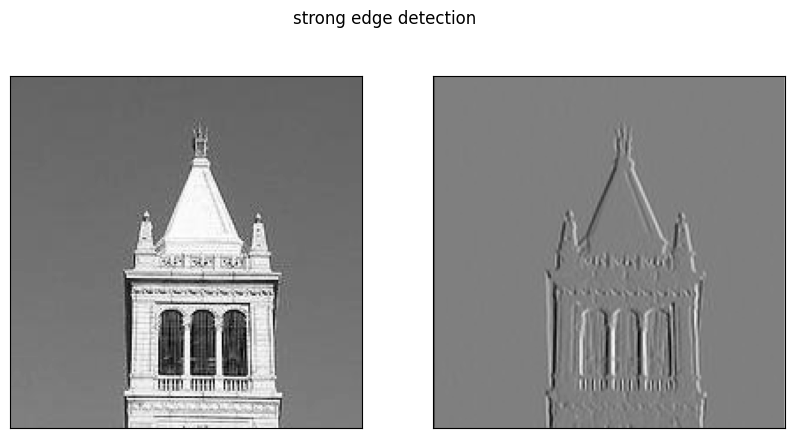

<Figure size 640x480 with 0 Axes>

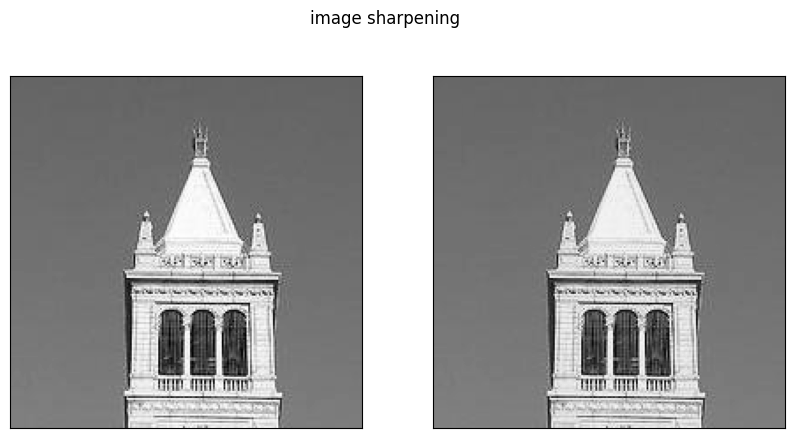

In [2]:
from scipy.signal import convolve2d

def convolve_image(image: np.ndarray, 
                   kernel: np.ndarray) -> np.ndarray:
  return convolve2d(image, kernel, mode='same', boundary='fill', fillvalue=0)

def convolve_and_plot(image: np.ndarray, 
                      kernel: np.ndarray, 
                      title: str) -> None:
  # Get convolved output
  convolved = convolve_image(image, kernel)

  # Plot
  plt.figure()
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  ax1.imshow(image, cmap='gray')
  ax1.set_xticks([])
  ax1.set_yticks([])
  ax2.imshow(convolved, cmap='gray')
  ax2.set_xticks([])
  ax2.set_yticks([])
  fig.suptitle(title)


# Define a few filters and try them out on the image

# For weak edge detection
edge_kernel = np.array(
    [
        [0, 1, 0],
        [1, -4, 1],
        [0, 1, 0]
    ]
)

# For strong edge detection
sobel_kernel = np.array(
    [
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ]
)

# For sharpening
sharpening_kernel = np.array(
    [
        [0, -1, 0],
        [-1, 50, -1],
        [0, -1, 0]
    ]
)

convolve_and_plot(img, edge_kernel, 'weak edge detection')
convolve_and_plot(img, sobel_kernel, 'strong edge detection')
convolve_and_plot(img, sharpening_kernel, 'image sharpening')

# Try to find a kernel that blurs the image

<Figure size 640x480 with 0 Axes>

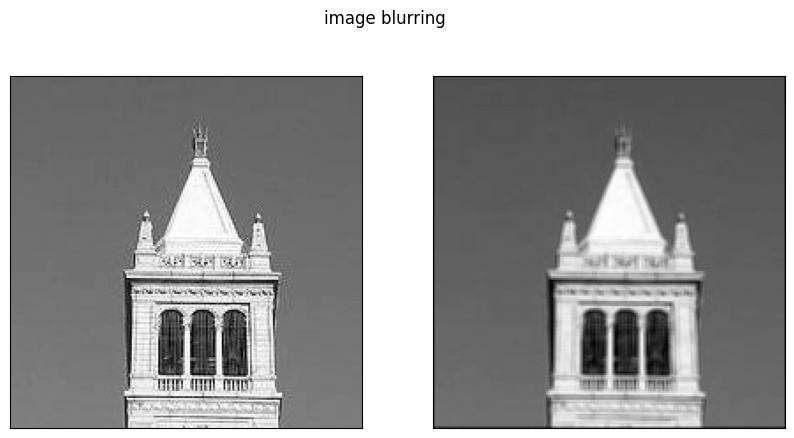

In [3]:
blurring_kernel = np.array(
    [
        [0.5, 0.5, 0.5],  
        [0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5],
    ]
)

convolve_and_plot(img, blurring_kernel, 'image blurring')